# Stock price prediction and forecasting using LSTM

FOR building this ML model i have used stacked LSTM (long short-term memory).
This for stock price prediction using the **Apple stock prices dataset (from tingo)**.

In [1]:
### Data Collection
import pandas_datareader as pdr
key="ada9cd8da4fb0396f5704a9584d4f0ebdda3ca31"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\MY PC\AppData\Local\Temp\ipykernel_9344\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [3]:
df.to_csv('AAPL.csv')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense#
from sklearn.model_selection import train_test_split

In [5]:
# Load the Apple stock prices dataset
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-06-04 00:00:00+00:00,191.83,193.42,191.35,191.64,26266174,45.827936,46.207785,45.713265,45.782545,105064696,0.0,1.0
1,AAPL,2018-06-05 00:00:00+00:00,193.31,193.94,192.36,193.07,21565963,46.181506,46.332012,45.954552,46.124171,86263852,0.0,1.0
2,AAPL,2018-06-06 00:00:00+00:00,193.98,194.08,191.92,193.63,20933619,46.341568,46.365458,45.849437,46.257954,83734476,0.0,1.0
3,AAPL,2018-06-07 00:00:00+00:00,193.46,194.20,192.34,194.14,21347180,46.217341,46.394126,45.949775,46.379792,85388720,0.0,1.0
4,AAPL,2018-06-08 00:00:00+00:00,191.70,192.00,189.77,191.17,26656799,45.796879,45.868549,45.335805,45.670263,106627196,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2023-05-25 00:00:00+00:00,172.99,173.895,171.6900,172.410,56058258,172.99,173.895,171.6900,172.410,56058258,0.0,1.0
1254,AAPL,2023-05-26 00:00:00+00:00,175.43,175.770,173.1100,173.320,54834975,175.43,175.770,173.1100,173.320,54834975,0.0,1.0
1255,AAPL,2023-05-30 00:00:00+00:00,177.30,178.990,176.5700,176.960,55964401,177.30,178.990,176.5700,176.960,55964401,0.0,1.0
1256,AAPL,2023-05-31 00:00:00+00:00,177.25,179.350,176.7600,177.325,99313268,177.25,179.350,176.7600,177.325,99313268,0.0,1.0
1257,AAPL,2023-06-01 00:00:00+00:00,180.09,180.120,176.9306,177.700,68901809,180.09,180.120,176.9306,177.700,68901809,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
#from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 441)

In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [16]:
# LSTM Model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
    model.add(LSTM(50,return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model
    

lstm_model = create_lstm_model()
lstm_model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
12/12 [==============================] - 28s 851ms/step - loss: 0.0380 - val_loss: 0.0024
Epoch 2/100
12/12 [==============================] - 4s 368ms/step - loss: 0.0132 

12/12 [==============================] - 4s 377ms/step - loss: 0.0017 - val_loss: 3.5686e-04
Epoch 70/100
12/12 [==============================] - 4s 374ms/step - loss: 0.0013 - val_loss: 2.2431e-04
Epoch 71/100
12/12 [==============================] - 5s 384ms/step - loss: 0.0012 - val_loss: 2.2096e-04
Epoch 72/100
12/12 [==============================] - 5s 398ms/step - loss: 0.0012 - val_loss: 2.5078e-04
Epoch 73/100
12/12 [==============================] - 5s 396ms/step - loss: 0.0017 - val_loss: 3.1408e-04
Epoch 74/100
12/12 [==============================] - 5s 389ms/step - loss: 0.0024 - val_loss: 2.1199e-04
Epoch 75/100
12/12 [==============================] - 5s 385ms/step - loss: 0.0015 - val_loss: 2.7441e-04
Epoch 76/100
12/12 [==============================] - 5s 375ms/step - loss: 0.0016 - val_loss: 2.0794e-04
Epoch 77/100
12/12 [==============================] - 4s 363ms/step - loss: 0.0018 - val_loss: 3.6377e-04
Epoch 78/100
12/12 [==============================] - 5s 38

In [17]:
### Lets Do the prediction and check performance metrics
train_predict=lstm_model.predict(X_train)
test_predict=lstm_model.predict(X_test)

11/11 [==============================] - 1s 92ms/step


In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.03530099734506599

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.016062889195987858

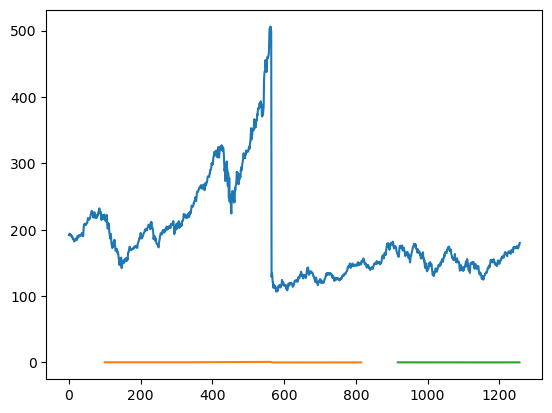

In [31]:
import matplotlib.pyplot as plt

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
len(test_data)

441

In [22]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [23]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [24]:
temp_input

[0.05838447088290544,
 0.05983719474013771,
 0.06675015654351907,
 0.0665497808390732,
 0.0699311208515967,
 0.0728866624921728,
 0.07105823418910456,
 0.07120851596743893,
 0.07772072636192856,
 0.08583594239198494,
 0.08939261114589853,
 0.08771446462116467,
 0.09297432686286783,
 0.09790857858484658,
 0.09056981840951783,
 0.0938008766437069,
 0.09665623043206006,
 0.11015654351909826,
 0.11937382592360674,
 0.1124358171571696,
 0.11974953036944269,
 0.11291170945522849,
 0.11028177833437691,
 0.1106324358171571,
 0.11774577332498432,
 0.11611772072636184,
 0.12145272385723233,
 0.11739511584220413,
 0.11448966812773947,
 0.10429555416405756,
 0.10537257357545393,
 0.10659987476518468,
 0.09986224170319347,
 0.10289292423293667,
 0.10161552911709448,
 0.09635566687539132,
 0.09785848465873509,
 0.11068252974326859,
 0.11769567939887288,
 0.11211020663744514,
 0.11529117094552283,
 0.1095804633688165,
 0.10434564809016905,
 0.10927989981214775,
 0.11458985597996241,
 0.11559173450219

In [25]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = lstm_model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        #x_input = x_input.reshape((1, n_steps,1))
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))
        yhat = lstm_model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17573877]
101
1 day input [0.05983719 0.06675016 0.06654978 0.06993112 0.07288666 0.07105823
 0.07120852 0.07772073 0.08583594 0.08939261 0.08771446 0.09297433
 0.09790858 0.09056982 0.09380088 0.09665623 0.11015654 0.11937383
 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244 0.11774577
 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555 0.10537257
 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567 0.09785848
 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046 0.10434565
 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617 0.12663745
 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158 0.12726362
 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511  0.14256731
 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577 0.14619912
 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323 0.14649969
 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969 0.15453976
 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993 0.16710081
 0.16758923 0.16463369 0.16338134

8 day output [[0.18524224]]
9 day input [0.08583594 0.08939261 0.08771446 0.09297433 0.09790858 0.09056982
 0.09380088 0.09665623 0.11015654 0.11937383 0.11243582 0.11974953
 0.11291171 0.11028178 0.11063244 0.11774577 0.11611772 0.12145272
 0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526

17 day output [[0.19415455]]
18 day input [0.11937383 0.11243582 0.11974953 0.11291171 0.11028178 0.11063244
 0.11774577 0.11611772 0.12145272 0.11739512 0.11448967 0.10429555
 0.10537257 0.10659987 0.09986224 0.10289292 0.10161553 0.09635567
 0.09785848 0.11068253 0.11769568 0.11211021 0.11529117 0.10958046
 0.10434565 0.1092799  0.11458986 0.11559173 0.12275517 0.12062617
 0.12663745 0.13134627 0.12771446 0.13046963 0.13377583 0.12884158
 0.12726362 0.13507827 0.13906074 0.14542267 0.14860363 0.1472511
 0.14256731 0.14482154 0.13823419 0.13515341 0.13340013 0.14707577
 0.14619912 0.14624922 0.14935504 0.15226049 0.14980589 0.14572323
 0.14649969 0.14259236 0.14256731 0.15421415 0.15739512 0.15716969
 0.15453976 0.15180964 0.14765185 0.16713838 0.16696306 0.16262993
 0.16710081 0.16758923 0.16463369 0.16338134 0.16338134 0.16493425
 0.17084534 0.17112085 0.16871634 0.16210394 0.16280526 0.16568566
 0.17179712 0.1764809  0.17635567 0.183469   0.17573877 0.17744115
 0.17888434 0.1801140

26 day output [[0.20289838]]
27 day input [0.11739512 0.11448967 0.10429555 0.10537257 0.10659987 0.09986224
 0.10289292 0.10161553 0.09635567 0.09785848 0.11068253 0.11769568
 0.11211021 0.11529117 0.10958046 0.10434565 0.1092799  0.11458986
 0.11559173 0.12275517 0.12062617 0.12663745 0.13134627 0.12771446
 0.13046963 0.13377583 0.12884158 0.12726362 0.13507827 0.13906074
 0.14542267 0.14860363 0.1472511  0.14256731 0.14482154 0.13823419
 0.13515341 0.13340013 0.14707577 0.14619912 0.14624922 0.14935504
 0.15226049 0.14980589 0.14572323 0.14649969 0.14259236 0.14256731
 0.15421415 0.15739512 0.15716969 0.15453976 0.15180964 0.14765185
 0.16713838 0.16696306 0.16262993 0.16710081 0.16758923 0.16463369
 0.16338134 0.16338134 0.16493425 0.17084534 0.17112085 0.16871634
 0.16210394 0.16280526 0.16568566 0.17179712 0.1764809  0.17635567
 0.183469   0.17573877 0.17744115 0.17888434 0.18011405 0.18121192
 0.18224317 0.18324758 0.1842448  0.18524224 0.18624119 0.18724051
 0.18823849 0.189233

In [26]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [27]:
len(df1)

1258

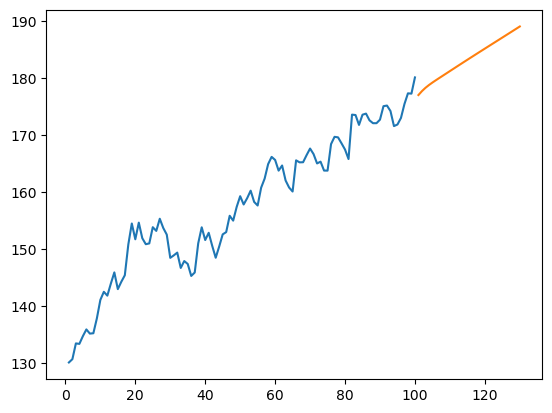

In [32]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
#plt.plot(day_new[:99], scaler.inverse_transform(df1[1158:]))
#plt.plot(day_pred, scaler.inverse_transform(lst_output))


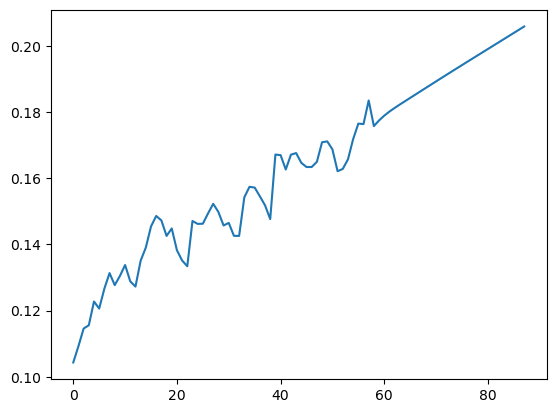

In [33]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [34]:
df3=scaler.inverse_transform(df3).tolist()

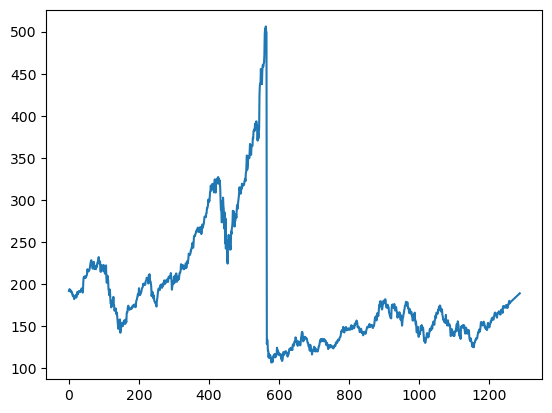

In [35]:
plt.plot(df3)